In [54]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from dataprep.eda import create_report
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [40]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [41]:
metric = 'AUC' # F1 or AUC

In [42]:
df = pd.read_pickle('../data/unified_dataframe/weekly_unprocessed.pkl')
df

,id,date,label_panas_negative_affect,label_stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates
0,621e2e8e67b776a24055b564,2021-05-31,Below average,Below average,34.408304,57.481,94.303,NaN,14.8,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,621e2e8e67b776a24055b564,2021-06-07,Below average,Average,34.476865,56.57,109.509,NaN,14.4,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,621e2e8e67b776a24055b564,2021-06-28,Below average,Above average,34.418045,53.006,107.388,NaN,15.6,76.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,621e2e8e67b776a24055b564,2021-07-19,Below average,Average,34.254286,57.33,100.374,NaN,15.0,75.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,621e2e8e67b776a24055b564,2021-07-26,Below average,Average,34.515655,59.798,98.515,NaN,15.4,74.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,621e339967b776a240e502de,2021-12-14,Below average,Below average,34.303759,46.311,56.468,96.5,11.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
280,621e339967b776a240e502de,2021-12-20,Below average,Average,34.876472,50.683,47.293,96.0,11.6,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,621e339967b776a240e502de,2021-12-27,Below average,Average,35.107574,54.325,47.929,95.4,12.2,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
282,621e339967b776a240e502de,2022-01-03,Below average,Average,34.957428,52.81,47.801,94.9,12.4,81.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
df_pre = pd.read_pickle('../data/unified_dataframe/weekly_data_preprocessed.pkl')
df_pre

,id,date,label_panas_negative_affect,label_stai_stress_category,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,...,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23,panas-1,stai-1,panas-2,stai-2
0,621e2e8e67b776a24055b564,2021-05-31,Below average,Below average,34.408304,57.481,94.303,96.1,14.8,81.0,...,3226.0,530.0,72.0,52.0,421.0,38.0,Below average,Average,Below average,Average
1,621e2e8e67b776a24055b564,2021-06-07,Below average,Average,34.476865,56.570,34.617,96.1,14.4,83.0,...,181.0,3079.0,37.0,173.0,179.0,45.0,Below average,Below average,Below average,Average
2,621e2e8e67b776a24055b564,2021-06-28,Below average,Above average,34.418045,53.006,34.617,96.1,15.6,76.0,...,3190.0,191.0,23.0,95.0,23.0,36.0,Below average,Average,Below average,Below average
3,621e2e8e67b776a24055b564,2021-07-19,Below average,Average,34.254286,57.330,100.374,96.1,15.0,75.0,...,1001.0,2215.0,231.0,1579.0,57.0,162.0,Below average,Above average,Below average,Average
4,621e2e8e67b776a24055b564,2021-07-26,Below average,Average,34.515655,59.798,98.515,96.1,15.4,74.0,...,2389.0,3393.0,162.0,62.0,15.0,151.0,Below average,Average,Below average,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,621e375b67b776a240290cdc,2021-06-01,Above average,Above average,34.480120,63.323,21.579,96.1,17.4,72.0,...,817.0,1384.0,2000.0,3158.0,536.0,33.0,Above average,Above average,Above average,Below average
280,621e375b67b776a240290cdc,2021-06-08,Above average,Above average,34.251482,63.730,20.485,96.1,17.0,78.0,...,3403.0,6047.0,2326.0,1469.0,1528.0,222.0,Above average,Above average,Above average,Above average
281,621e375b67b776a240290cdc,2021-06-22,Above average,Above average,34.588002,65.664,19.511,96.1,17.0,80.0,...,290.0,210.0,1857.0,5394.0,2275.0,44.0,Above average,Above average,Above average,Above average
282,621e375b67b776a240290cdc,2021-07-06,Above average,Above average,34.720564,60.287,23.620,96.1,17.0,75.0,...,254.0,267.0,299.0,259.0,252.0,176.0,Above average,Above average,Above average,Above average


# Predict stai from weekly dataframe

In [44]:
stai = df.drop(columns=['date', 'label_panas_negative_affect'])

In [45]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stai)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [46]:
s = setup(data=train_data, target='label_stai_stress_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(182, 64)"
5,Missing Values,True
6,Numeric Features,31
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='label_stai_stress_category',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numeric...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='label_stai_stress_category')),
              

In [47]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.3955,0.5248,0.3679,0.4403,0.3779,0.0689,0.0821,0.4067
rf,Random Forest Classifier,0.3616,0.5209,0.3358,0.3924,0.3398,0.0297,0.0432,0.6533
ada,Ada Boost Classifier,0.4294,0.5201,0.3726,0.4050,0.4086,0.0916,0.0944,0.1100
nb,Naive Bayes,0.4068,0.5118,0.3574,0.3616,0.3736,0.0607,0.0668,1.9533
qda,Quadratic Discriminant Analysis,0.3220,0.5097,0.3317,0.2171,0.2375,0.0166,0.0008,0.0267
et,Extra Trees Classifier,0.3672,0.5070,0.3310,0.3927,0.3479,0.0185,0.0250,0.2733
dummy,Dummy Classifier,0.3277,0.5000,0.3333,0.1122,0.1660,0.0000,0.0000,0.0167
lda,Linear Discriminant Analysis,0.3390,0.4950,0.3351,0.3444,0.3330,0.0010,0.0011,0.0267
dt,Decision Tree Classifier,0.3220,0.4914,0.2891,0.3590,0.3289,-0.0317,-0.0308,1.1433
lightgbm,Light Gradient Boosting Machine,0.3503,0.4830,0.3284,0.4064,0.3438,0.0176,0.0263,0.6267


create_model_container: 13
master_model_container: 13
display_container: 2
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
compare_models() succesfully completed......................................


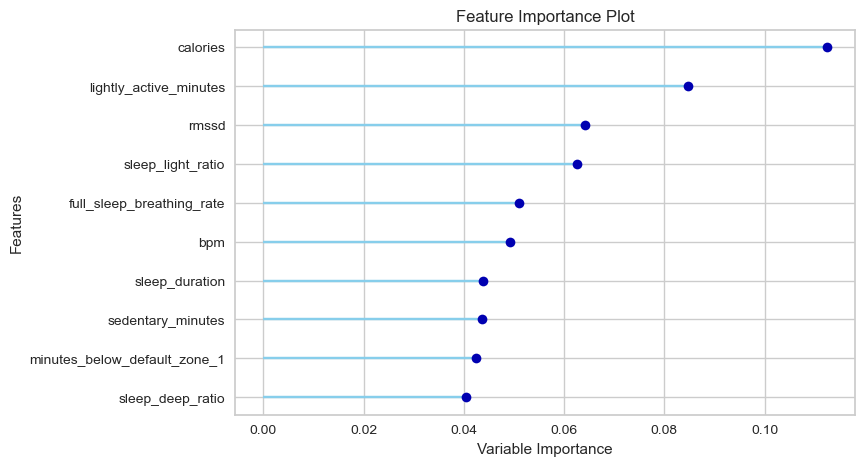

Visual Rendered Successfully
plot_model() succesfully completed......................................


In [48]:
plot_model(best, plot='feature')

In [49]:
stai = df_pre.drop(columns=['date', 'label_panas_negative_affect'])

In [50]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stai)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [51]:
s = setup(data=train_data, target='label_stai_stress_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(182, 125)"
5,Missing Values,True
6,Numeric Features,97
7,Categorical Features,27
8,Ordinal Features,False
9,High Cardinality Features,False


create_model_container: 0
master_model_container: 0
display_container: 1
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='label_stai_stress_category',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numeric...
                 Remove_100(target='label_stai_stress_category')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'),
                ('fix_multi',
       

In [52]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4407,0.6160,0.4477,0.4988,0.4070,0.1682,0.1951,0.0433
dt,Decision Tree Classifier,0.4689,0.5996,0.4629,0.4740,0.4614,0.1932,0.1976,0.0467
rf,Random Forest Classifier,0.3785,0.5893,0.3869,0.3900,0.3691,0.0597,0.0615,0.2833
et,Extra Trees Classifier,0.4011,0.5891,0.4037,0.4262,0.3984,0.0890,0.0920,0.1933
lr,Logistic Regression,0.3559,0.5841,0.3594,0.3545,0.3403,0.0295,0.0303,0.1033
gbc,Gradient Boosting Classifier,0.4124,0.5826,0.4149,0.4229,0.3931,0.1152,0.1213,0.4833
lightgbm,Light Gradient Boosting Machine,0.3785,0.5763,0.3951,0.4041,0.3669,0.0756,0.0819,0.4167
knn,K Neighbors Classifier,0.3898,0.5510,0.4483,0.4697,0.3216,0.1341,0.1651,0.0633
lda,Linear Discriminant Analysis,0.3785,0.5489,0.3850,0.4187,0.3524,0.0654,0.0657,0.0367
qda,Quadratic Discriminant Analysis,0.3503,0.5325,0.3673,0.4190,0.3571,0.0530,0.0558,0.0600


create_model_container: 14
master_model_container: 14
display_container: 2
GaussianNB(priors=None, var_smoothing=1e-09)
compare_models() succesfully completed......................................


In [ ]:
plot_model(best, plot='feature')

In [58]:
df = pd.read_pickle('../data/unified_dataframe/weekly_data_preprocessed.pkl')
stai = df.drop(columns=['date', 'label_panas_negative_affect'])
stai = stai[stai['label_stai_stress_category'].notna()]
y = stai['label_stai_stress_category']

In [59]:
# create_report(df).show_browser()

In [60]:
cols = ['stress_score', 'steps', 'sleep_duration']
for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date",
                                          n_jobs=5, column_kind=None, column_value=col,
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    stai = stai.merge(extracted_features, how='left', on=['id'])

Feature Extraction:  33%|███▎      | 6/18 [00:07<00:14,  1.18s/it]


IndexError: cannot do a non-empty take from an empty axes.

In [ ]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stai)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='label_stai_stress_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

In [ ]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

In [ ]:
plot_model(best, plot='feature')

In [ ]:
d = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(best.coef_[0])}).sort_values(by='Value', ascending=False)

In [ ]:
pd.set_option('display.max_rows', 500)
d.reset_index(inplace=True)
d

In [ ]:
d['Feature']